# Pitch-type Clustering

### Imports

In [540]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### Read the pitcher CSVs, plots

   ID    Pitcher PitcherTeam  RelSpeed  SpinRate  InducedVertBreak  HorzBreak  \
0   1  Pitcher A      Team A  1.110934 -0.479266          0.880880   0.681923   
1   2  Pitcher A      Team A -0.688395  0.908157         -0.206066  -0.592301   
2   3  Pitcher A      Team A  0.883463 -0.831871          0.162825   1.516798   
3   4  Pitcher A      Team A -1.375990  0.896492         -0.885786  -0.778453   
4   5  Pitcher A      Team A  0.730018 -1.474423          0.169020   1.588309   

   RelHeight  RelSide  
0    5.54946  1.75546  
1    5.54872  1.76240  
2    5.57030  1.66684  
3    5.64562  1.84130  
4    5.44747  1.81584  
----------------------
(666, 9)
----------------------


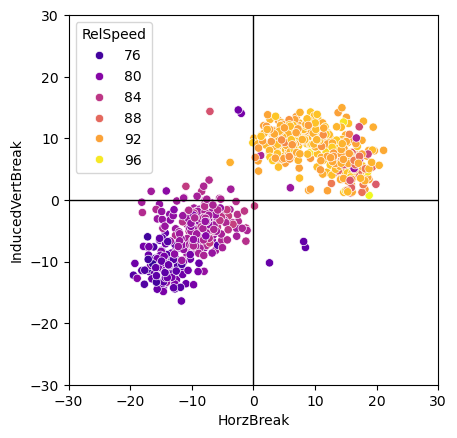

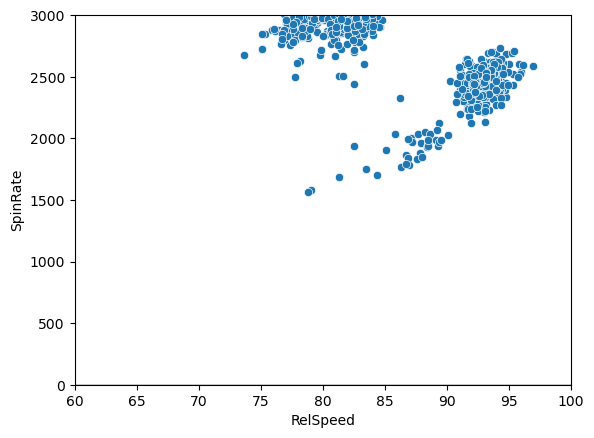

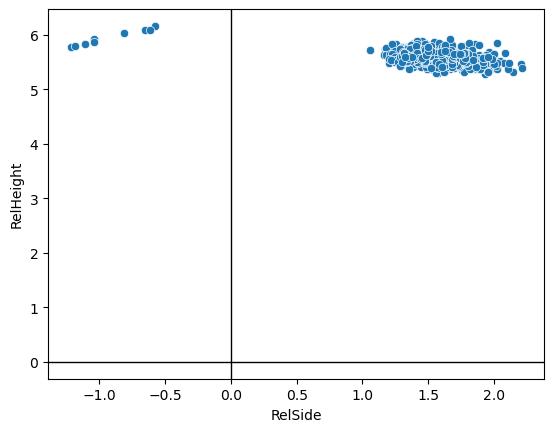

In [2285]:
file_path = "C:/Users/bywang2/Desktop/WCThunderbolts/pitcher materials/materials/PLAYER-A.csv"
base_name = os.path.splitext(os.path.basename(file_path))[0]
columns_to_keep = ['ID',"RelSpeed", "SpinRate", "InducedVertBreak", "HorzBreak",  "RelHeight", "RelSide","Pitcher","PitcherTeam"] #"SpinAxis",
df = pd.read_csv(file_path, usecols=columns_to_keep)
df = df.dropna()
df
cols_to_scale = ['RelSpeed', 'SpinRate', 'InducedVertBreak', 'HorzBreak'] #,"SpinAxis"
X = df.copy()
scaler = StandardScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
print(X.head())
print("----------------------")
print(X.shape)
print("----------------------")
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='HorzBreak', y='InducedVertBreak', data=df, hue = 'RelSpeed', palette='plasma')
plt.xlabel('HorzBreak')
plt.ylabel('InducedVertBreak')
plt.xlim(-30, 30)
plt.ylim(-30, 30)
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.gca().set_aspect('equal', adjustable='box')  # optional: keep scale 1:1
x_vals = [0, 30]
y_vals = [0, 30]
#plt.plot(x_vals, y_vals, linestyle='--', color='red')
x_valsn = [0, -30]
y_valsn = [0, 30]
#plt.plot(x_valsn, y_valsn, linestyle='--', color='red')

plt.show()
plt.show()



sns.scatterplot(x='RelSpeed', y='SpinRate', data=df)
plt.xlabel('RelSpeed')
plt.ylabel('SpinRate')
plt.xlim(60, 100)
plt.ylim(0, 3000)
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
#plt.gca().set_aspect('equal', adjustable='box')  # optional: keep scale 1:1
plt.show()




sns.scatterplot(x='RelSide', y='RelHeight', data=df)
plt.xlabel('RelSide')
plt.ylabel('RelHeight')
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
#plt.gca().set_aspect('equal', adjustable='box')  # optional: keep scale 1:1
plt.show()


In [2066]:
#df_filtered = df[(df['SpinRate'] >= 1500) & (df['SpinRate'] <= 2500)]

### T-sne

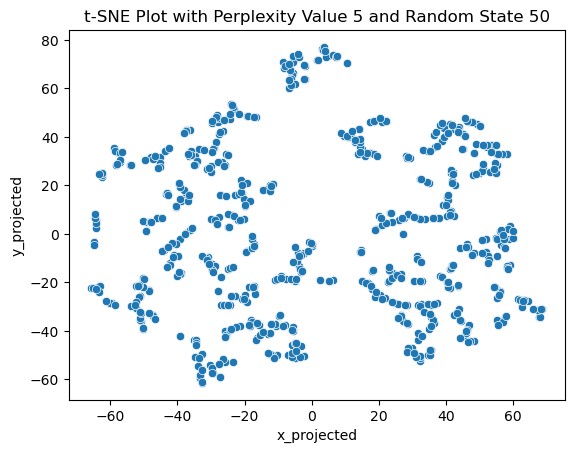

------------------------------------------


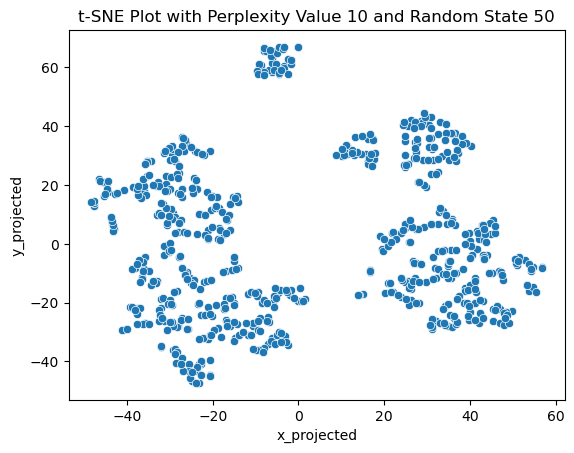

------------------------------------------


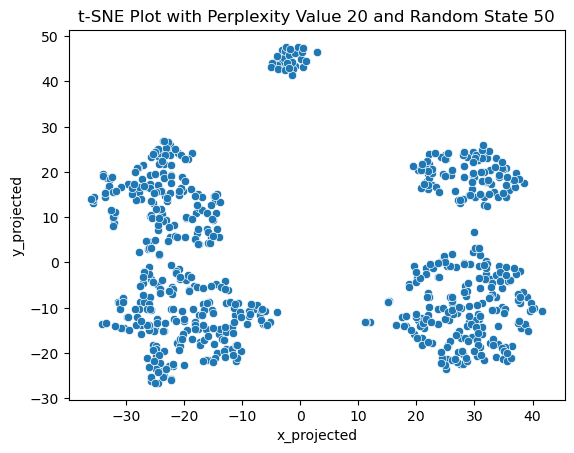

------------------------------------------


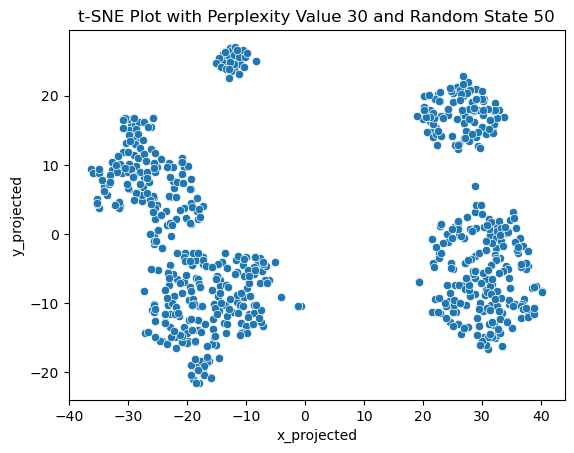

------------------------------------------


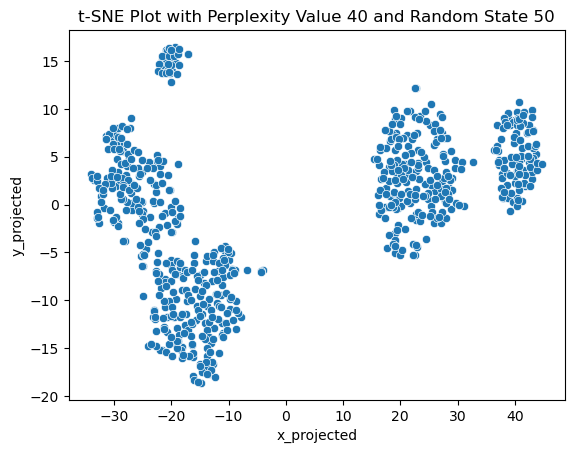

------------------------------------------


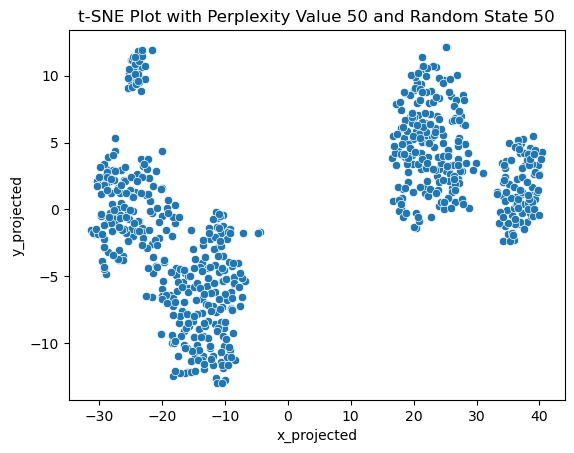

------------------------------------------


In [2287]:
cols_for_kmeans = ['RelSpeed', 'SpinRate', 'InducedVertBreak', 'HorzBreak'] #,"SpinAxis"
#cols_for_kmeans = ['InducedVertBreak', 'HorzBreak']
for perp in [5, 10, 20, 30, 40, 50]:
    for rs in [50]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(X[cols_for_kmeans])
        df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
        df_combo = pd.concat([X, df_tsne], axis=1)
        sns.scatterplot(x='x_projected', y='y_projected', data=df_combo)
        plt.title(f't-SNE Plot with Perplexity Value {perp} and Random State {rs}')
        plt.show()

        print('------------------------------------------')

### Pick the perplexity value that you like best, set up the t-sne for futute diagnostic

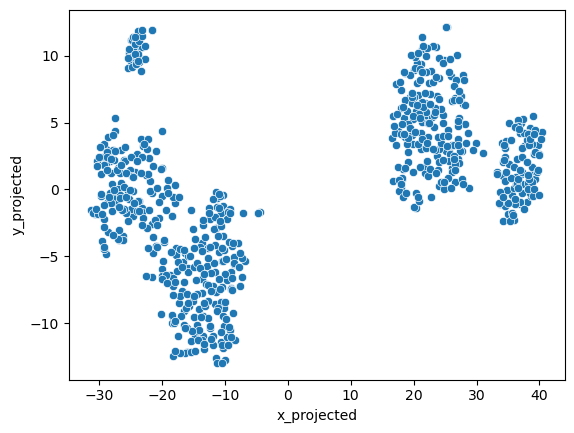

In [2289]:
tsne = TSNE(n_components=2, perplexity=50, random_state=50)
data_tsne = tsne.fit_transform(X[cols_to_scale])
X[['x_projected', 'y_projected']] = data_tsne

sns.scatterplot(x='x_projected', y='y_projected', data=X)
plt.xlabel('x_projected')
plt.ylabel('y_projected')
plt.show()


## Skip if t-sne is well separated, you know how many clusters, and think K-means will work
### DBSCAN

In [ ]:
cols_for_dbscan = ['RelSpeed', 'SpinRate', 'InducedVertBreak', 'HorzBreak'] #,"SpinAxis"

for minpts in [3,4,5,6,7,8,9,10]:
    for eps in np.arange(1, 0.2, -0.2):
        dst = DBSCAN(eps=eps, min_samples=minpts, metric='euclidean')
        
        # Fit only on selected columns
        X['predicted_cluster'] = dst.fit_predict(X[cols_for_dbscan])

        X_noise = X[X['predicted_cluster'] == -1]
        X_clean = X[X['predicted_cluster'] >= 0]

        plt.figure(figsize=(6, 5))

        if not X_clean.empty:
            k = X_clean['predicted_cluster'].nunique()
            sns.scatterplot(
                x='HorzBreak', y='InducedVertBreak',
                hue='predicted_cluster',
                palette=sns.color_palette('husl', k),
                data=X_clean,
                legend='full'
            )

        if not X_noise.empty:
            sns.scatterplot(
                x='HorzBreak', y='InducedVertBreak',
                color='black',
                data=X_noise,
                label='Noise'
            )

        plt.title(f'minpts={minpts}, eps={eps}')
        plt.legend(bbox_to_anchor=(1, 1))
        plt.show()

        print(f'Number of Noise Points: {len(X_noise)}')
        print(f'Number of Clusters: {X_clean["predicted_cluster"].nunique()}')
        print('-----------------------')

## Skip if t-sne is well separated, you know how many clusters, and think K-means will work
### Pick the parameters (eps, min_samples) that yield the clustering you like best

In [ ]:
cols_for_dbscan = ['RelSpeed', 'SpinRate', 'InducedVertBreak', 'HorzBreak'] #,"SpinAxis"
dst = DBSCAN(eps=0.8, min_samples= 7, metric='euclidean')
X['predicted_cluster'] = dst.fit_predict(X[cols_for_dbscan])
print(X.shape)
####### Right now the code is set up that it would only remove outliers, but can alwo get rid of clusters that looks like outliers too #########
X = X[X['predicted_cluster'] != -1]
X = X.reset_index(drop=True)
#X.shape
print(X.shape)
print(X.head())

## Skip if you're satisfied with DBSCAN results
### Method 2 : K-means (pick n_clusters from observing the plots)

In [2268]:
from sklearn.cluster import KMeans
cols_for_kmeans = ['RelSpeed', 'SpinRate', 'InducedVertBreak', 'HorzBreak'] #"SpinAxis"
kmeans = KMeans(n_clusters=5, random_state=2) #91  # you can change n_clusters as needed
X['predicted_cluster'] = kmeans.fit_predict(X[cols_for_kmeans])


### Results
#### T-sne plot

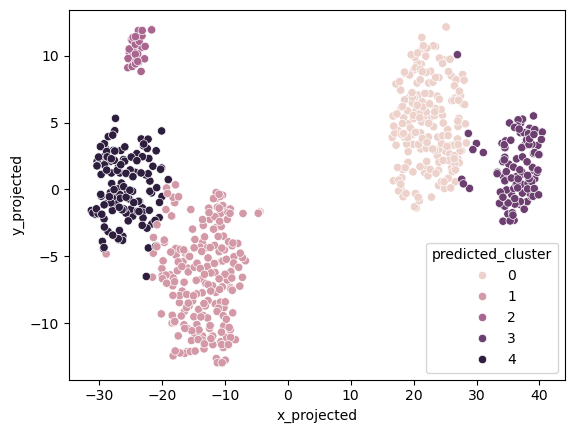

In [2270]:
sns.scatterplot(x='x_projected', y='y_projected', hue='predicted_cluster', data=X)
plt.xlabel('x_projected')
plt.ylabel('y_projected')
plt.show()

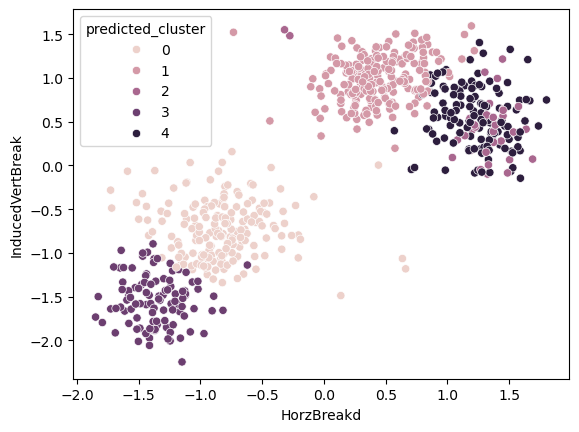

In [2272]:
sns.scatterplot(x='HorzBreak', y='InducedVertBreak', hue='predicted_cluster', data=X)
plt.xlabel('HorzBreakd')
plt.ylabel('InducedVertBreak')
plt.show()

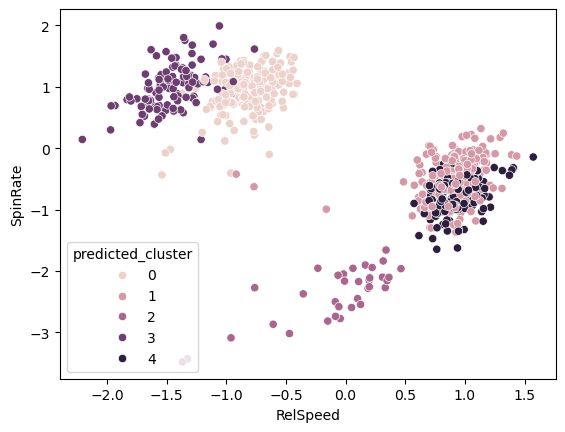

In [2274]:
sns.scatterplot(x='RelSpeed', y='SpinRate', hue='predicted_cluster', data=X)
plt.xlabel('RelSpeed')
plt.ylabel('SpinRate')
plt.show()

### Scale back

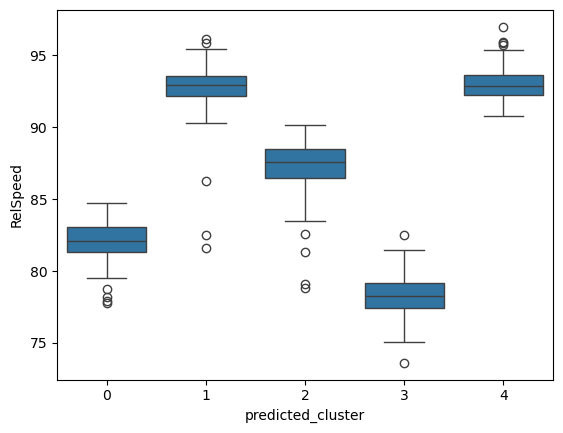

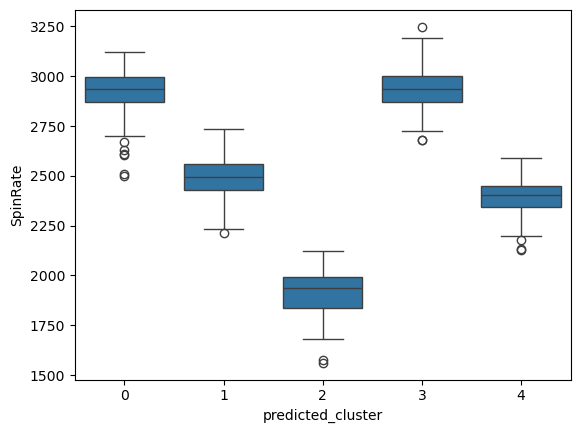

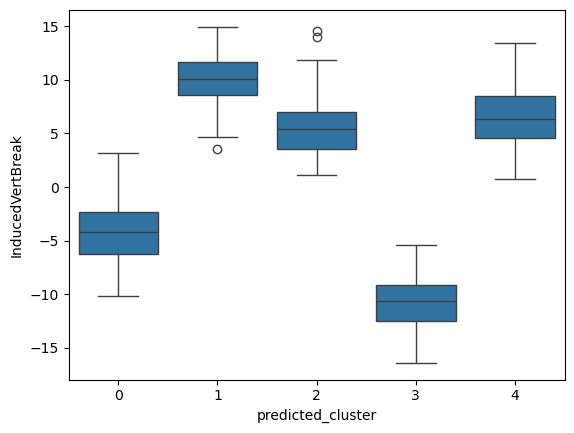

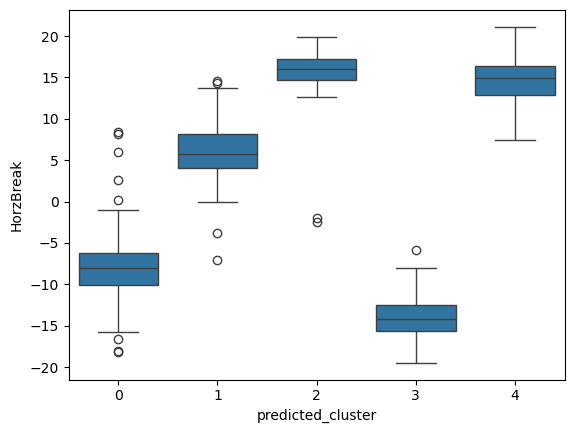

In [2276]:
X[cols_to_scale] = scaler.inverse_transform(X[cols_to_scale])
for col in X.columns[3:7]:
 sns.boxplot(x='predicted_cluster', y=col, data=X)
 plt.show()

### Output the medians of the clusters (for future tagging)

In [2279]:
import os
import pandas as pd


# Compute medians
cluster_medians = X.groupby('predicted_cluster')[cols_to_scale].median()

# Add cluster counts
cluster_counts = X['predicted_cluster'].value_counts().sort_index()
cluster_medians['count'] = cluster_counts

# Round and display
cluster_medians = cluster_medians.round(3)
print(cluster_medians)

# Extract name and team from the second row (index 1)
#pitcher_name = X.loc[1, 'Pitcher']  # Optional: replace spaces
#pitcher_team = X.loc[1, 'PitcherTeam'].replace(" ", "_")

# Construct filename
#basename = f"{pitcher_name}-{pitcher_team}"

# Save to desired folder
output_path = f"C:/Users/bywang2/Desktop/WCThunderbolts/pitcher materials/rosters/team/{base_name}.csv"
cluster_medians.to_csv(output_path)

print(f"\nSaved to: {output_path}")



                   RelSpeed  SpinRate  InducedVertBreak  HorzBreak  count
predicted_cluster                                                        
0                    82.089  2936.319            -4.158     -8.071    187
1                    92.929  2493.490            10.111      5.766    211
2                    87.604  1936.918             5.423     16.000     34
3                    78.296  2937.800           -10.642    -14.134    105
4                    92.838  2401.315             6.365     14.959    129

Saved to: C:/Users/bywang2/Desktop/WCThunderbolts/pitcher materials/rosters/js/duncan-32.csv


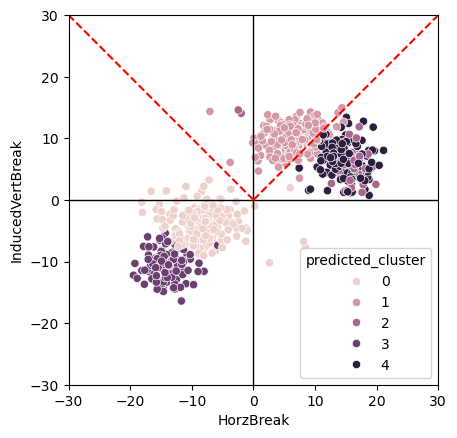

In [2281]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='HorzBreak', y='InducedVertBreak', data=X, hue = 'predicted_cluster')
plt.xlabel('HorzBreak')
plt.ylabel('InducedVertBreak')
plt.xlim(-30, 30)
plt.ylim(-30, 30)
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.gca().set_aspect('equal', adjustable='box')  # optional: keep scale 1:1
x_vals = [0, 30]
y_vals = [0, 30]
plt.plot(x_vals, y_vals, linestyle='--', color='red')
x_valsn = [0, -30]
y_valsn = [0, 30]
plt.plot(x_valsn, y_valsn, linestyle='--', color='red')
plt.show()


### Use the results above to name these pitch clusters

In [2283]:
df = df.merge(X[['ID', 'predicted_cluster']], on='ID', how='left')

cluster_map = {
    #-1: 'TBD',
     4: 'Sinker',
     3: 'Curveball',
     #2: 'Sweeper',
     0: 'Slider',
     1: 'Fastball',
     #1: 'Cutter',
     2: 'Changeup',
    #3: 'Splitter'
}

df['RetagPitchType'] = df['predicted_cluster'].map(cluster_map)
df = df[df['ID'].isin(X['ID'])].copy()
print(df.head())

clustering_df = pd.read_csv(r"C:\Users\bywang2\Desktop\WCThunderbolts\pitcher materials\materials\PLAYER-A.csv")
filtered_clustering_df = clustering_df[clustering_df['ID'].isin(df['ID'])]
filtered_clustering_df.head()
filtered_clustering_df = filtered_clustering_df.merge(
    df[['ID', 'RetagPitchType']],
    on='ID',
    how='left'
)
filtered_clustering_df.head()
filtered_clustering_df.to_csv(r"C:\Users\bywang2\Desktop\WCThunderbolts\pitcher materials\materials\PLAYER-A.csv", index=False)

   ID       Pitcher PitcherTeam  RelSpeed     SpinRate  InducedVertBreak  \
0   1  Duncan, Greg   WIN_CIT29  94.12374  2486.751183           9.12130   
1   2  Duncan, Greg   WIN_CIT29  83.00579  2913.832817           0.25146   
2   3  Duncan, Greg   WIN_CIT29  92.71821  2378.211055           3.26173   
3   4  Duncan, Greg   WIN_CIT29  78.75718  2910.242060          -5.29528   
4   5  Duncan, Greg   WIN_CIT29  91.77008  2180.418555           3.31229   

   HorzBreak  RelHeight  RelSide  predicted_cluster RetagPitchType  
0    8.66926    5.54946  1.75546                  1       Fastball  
1   -5.50355    5.54872  1.76240                  0         Slider  
2   17.95532    5.57030  1.66684                  4         Sinker  
3   -7.57406    5.64562  1.84130                  0         Slider  
4   18.75072    5.44747  1.81584                  4         Sinker  
